# Lab 3 Note
#### Co-authors: SBUID#113378962, SBUID#113511442, SBUID#115326857
### Basic Information
    1. Observation Date: 18:00-2:30, Nove. 2, 2023
    2. Objectives: 
        1. Calibration of Camera
            1. Dark Frame
            2. Flat-Field
            3. Spectroscopic Calibration
        2. Get Science Image of Each Target

## Data Analysis
### Import Package

In [13]:
### Import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from scipy import stats
from scipy.stats import norm
#from Ipython.display import Image
from astropy.visualization import ZScaleInterval, ImageNormalize

### 1. Dark Frame
#### 1.1 Dark Frames Series with 20s Exposure time (Gam Cas)

the amount of hot pixels in the dark frame 0 is 194
the amount of hot pixels in the dark frame 1 is 188
the amount of hot pixels in the dark frame 2 is 200
the amount of hot pixels in the dark frame 3 is 192
the amount of hot pixels in the dark frame 4 is 191
the amount of hot pixels in the dark frame 5 is 200
the amount of hot pixels in the dark frame 6 is 203
the amount of hot pixels in the dark frame 7 is 202
the amount of hot pixels in the dark frame 8 is 206
the amount of hot pixels in the dark frame 9 is 208


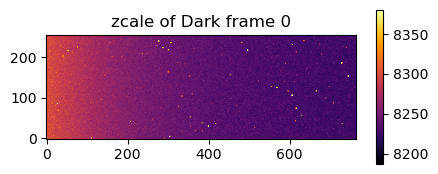

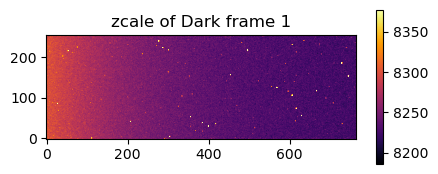

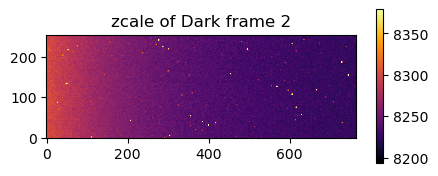

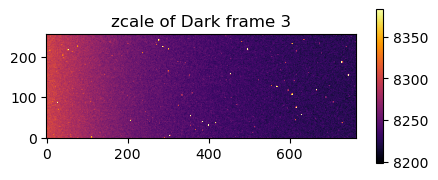

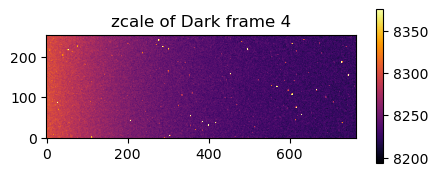

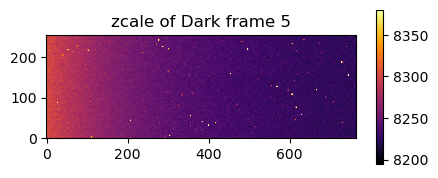

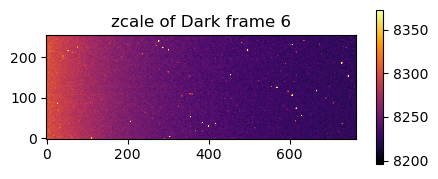

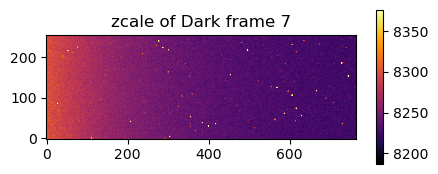

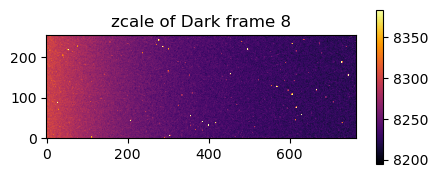

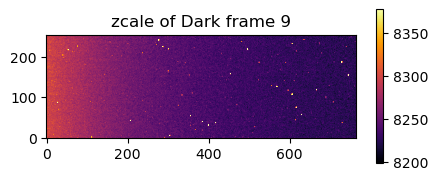

In [14]:
### Read Dark Frame files and get their data information
df_list = []
imagedata_list = []
median_list = []
df_cv_list = []
hpcount_list = []

for i in range(10):
    filename = f'gamcas/darkframe/lab3_science_spectra_gamcas_dark.0000000{i}.DARK.FIT'
    df = fits.open(filename)
    df_list.append(df)
    ### get image data of each
    imagedata = df[0].data
    imagedata_list.append(imagedata)
    ### Convert 2d array into 1d array
    df_cv=imagedata.flatten()
    df_cv_list.append(df_cv)
    ### get median of each Fits file
    median = np.median(df_cv)
    median_list.append(median)
    ### Get the amount of hot pixels for each files
    threshold = 8350
    hpr = imagedata > threshold
    hpcount = np.sum(hpr)
    print(f'the amount of hot pixels in the dark frame {i} is {hpcount}')
    hpcount_list.append(hpcount)
    ### plot each files
    plt.figure(figsize=(5,2))
    plt.imshow(imagedata, cmap='inferno',norm=ImageNormalize(imagedata, interval=ZScaleInterval()),origin='lower')
    plt.colorbar()
    plt.title(f'zcale of Dark frame {i}')


In [15]:
### Add them up and get their median
sum_of_imagedatas = np.sum(imagedata_list, axis=0)
allimages = np.array(imagedata_list)
avg_image = np.median(allimages, axis=0)
avg_image.shape

(255, 765)

In [16]:
### Rewrite it into a new Fits file
newdf = fits.PrimaryHDU(avg_image)
newdf.writeto('gamcas/darkframe/df_median.fits', overwrite=True)

In [17]:
print(np.median(avg_image))

8239.0


In [18]:
nor_df = avg_image/np.median(avg_image)
newdf_nor = fits.PrimaryHDU(nor_df)
newdf_nor.writeto('df_median_nor_gamcas.fits', overwrite=True)

In [19]:
imagedata_dfS = newdf.data
imagedata_dfS.shape 

(255, 765)

Text(0.5, 1.0, 'Master Dark Frame of Gam Cas')

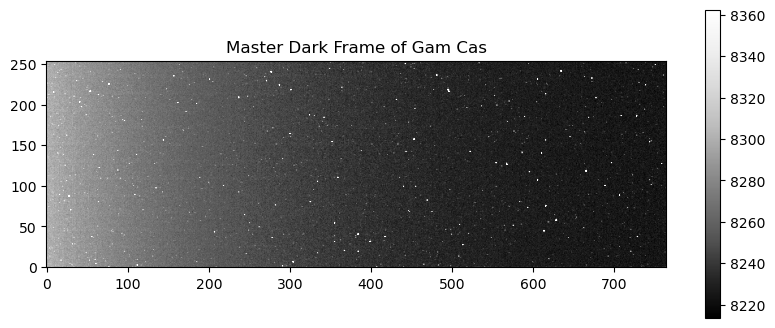

In [20]:
plt.figure(figsize=(10,4))
plt.imshow(imagedata_dfS, cmap='Greys_r',norm=ImageNormalize(imagedata_dfS, interval=ZScaleInterval()),origin='lower')
plt.colorbar()
plt.title('Master Dark Frame of Gam Cas')

#### 1.2 Dark Frames Series with 30s Exposure time (Ksi Per)

the amount of hot pixels in the dark frame 0 is 367
the amount of hot pixels in the dark frame 1 is 343
the amount of hot pixels in the dark frame 2 is 331
the amount of hot pixels in the dark frame 3 is 324
the amount of hot pixels in the dark frame 4 is 319
the amount of hot pixels in the dark frame 5 is 323
the amount of hot pixels in the dark frame 6 is 325
the amount of hot pixels in the dark frame 7 is 338
the amount of hot pixels in the dark frame 8 is 332
the amount of hot pixels in the dark frame 9 is 340


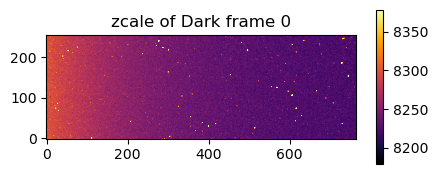

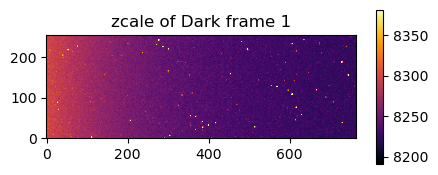

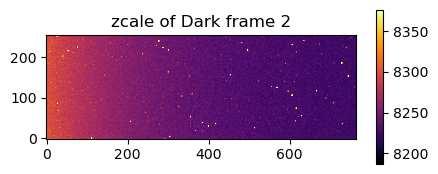

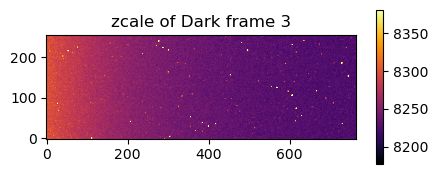

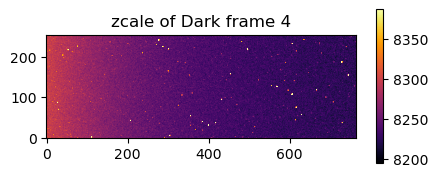

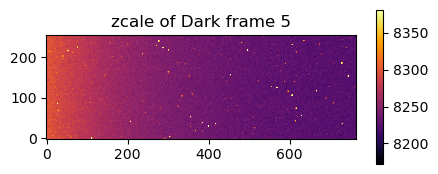

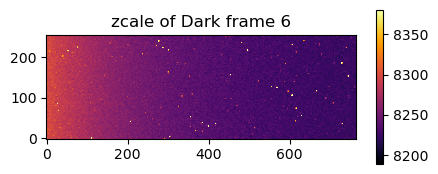

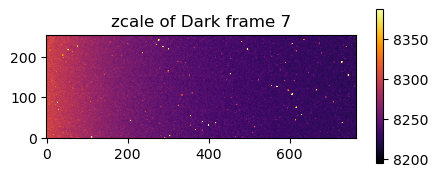

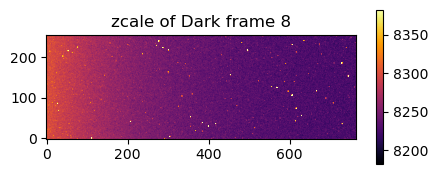

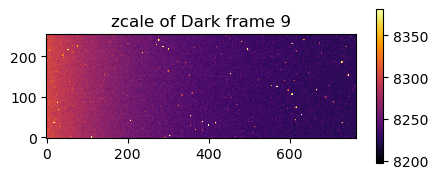

In [21]:
### Read Dark Frame files and get their data information
df_list = []
imagedata_list = []
median_list = []
df_cv_list = []
hpcount_list = []

for i in range(10):
    filename = f'ksiper/darkframe/lab3_science_spectra_ksii_dark.0000000{i}.DARK.FIT'
    df = fits.open(filename)
    df_list.append(df)
    ### get image data of each
    imagedata = df[0].data
    imagedata_list.append(imagedata)
    ### Convert 2d array into 1d array
    df_cv=imagedata.flatten()
    df_cv_list.append(df_cv)
    ### get median of each Fits file
    median = np.median(df_cv)
    median_list.append(median)
    ### Get the amount of hot pixels for each files
    threshold = 8350
    hpr = imagedata > threshold
    hpcount = np.sum(hpr)
    print(f'the amount of hot pixels in the dark frame {i} is {hpcount}')
    hpcount_list.append(hpcount)
    ### plot each files
    plt.figure(figsize=(5,2))
    plt.imshow(imagedata, cmap='inferno',norm=ImageNormalize(imagedata, interval=ZScaleInterval()),origin='lower')
    plt.colorbar()
    plt.title(f'zcale of Dark frame {i}')

In [22]:
### Add them up and get their median
sum_of_imagedatas = np.sum(imagedata_list, axis=0)
allimages = np.array(imagedata_list)
avg_image = np.median(allimages, axis=0)
avg_image.shape

(255, 765)

In [23]:
### Rewrite it into a new Fits file
newdf = fits.PrimaryHDU(avg_image)
newdf.writeto('ksiper/darkframe/df_median_ksiper.fits', overwrite=True)

In [24]:
imagedata_dfS = newdf.data
imagedata_dfS.shape 

(255, 765)

In [25]:
nor_df = avg_image/np.median(avg_image)
newdf_nor = fits.PrimaryHDU(nor_df)
newdf.writeto('df_median_nor_ksiper.fits', overwrite=True)

Text(0.5, 1.0, 'Master Dark Frame of Ksi per')

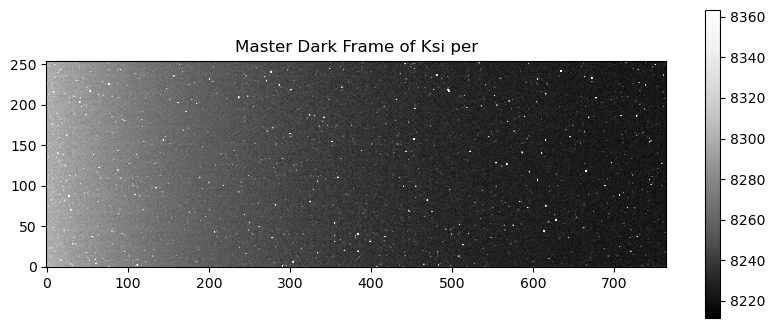

In [26]:
plt.figure(figsize=(10,4))
plt.imshow(imagedata_dfS, cmap='Greys_r',norm=ImageNormalize(imagedata_dfS, interval=ZScaleInterval()),origin='lower')
plt.colorbar()
plt.title('Master Dark Frame of Ksi per')

### 2 Flat-fields
#### 2.1 Master Flat-field

In [27]:
### Read Dark Frame files and get their data information
ff_list = []
imagedata_ff_list = []
median_ff_list = []
ff_cv_list = []

for i in range(10):
    filename = f'flat_field/lab3_spec_config_flat.0000000{i}.FLAT.FIT'
    ff = fits.open(filename)
    ff_list.append(ff)
    ### get image data of each
    imagedata_ff = ff[0].data
    imagedata_ff_list.append(imagedata_ff)
    header = ff[0].header
    temp = ff[0].header.get('CCD-TEMP',-1)
    print(f'Temperature of Flat-Field {i+1}:', temp)
    ### Convert 2d array into 1d array
    ff_cv=imagedata_ff.flatten()
    ff_cv_list.append(ff_cv)
    ### get median of each Fits file
    median_ff = np.median(ff_cv)
    median_ff_list.append(median_ff)
    ### plot each files
    #plt.figure(figsize=(10,8))
    #plt.imshow(imagedata_ff, cmap='inferno',norm=ImageNormalize(imagedata_ff, interval=ZScaleInterval()))
    #plt.colorbar()
    #plt.title(f'zcale of Flat_Field {i+1}')

Temperature of Flat-Field 1: -3.157345261859
Temperature of Flat-Field 2: -3.157345261859
Temperature of Flat-Field 3: -3.157345261859
Temperature of Flat-Field 4: -3.157345261859
Temperature of Flat-Field 5: -3.157345261859
Temperature of Flat-Field 6: -3.157345261859
Temperature of Flat-Field 7: -3.573019371449
Temperature of Flat-Field 8: -3.573019371449
Temperature of Flat-Field 9: -3.573019371449
Temperature of Flat-Field 10: -3.988286140373


In [28]:
### Add them up and get their median (same as dark frame)
sum_of_imagedatas_ff = np.sum(imagedata_ff_list, axis=0)
allimages_ff = np.array(imagedata_ff_list)
master_ff = np.median(allimages_ff, axis=0)
# avg_image_ff.shape

### Normalize the master flat-fields
nor_master_ff = master_ff/ np.median(master_ff)

### Rewrite it into a new Fits file
newff = fits.PrimaryHDU(nor_master_ff)
newff.writeto('flat_field/newff_median.fits', overwrite=True)

imagedata_ffS = newff.data
imagedata_ffS.shape 

(255, 765)

In [29]:
newff_unor = fits.PrimaryHDU(master_ff)
newff_unor.writeto('flat_field/newff_median_unor.fits', overwrite=True)

Text(0.5, 1.0, 'Normalized Master Flat-field')

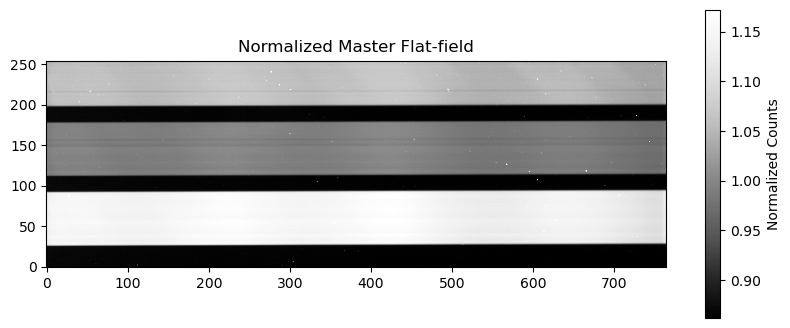

In [30]:
### Plot of the master flat-field
plt.figure(figsize=(10,4))
plt.imshow(imagedata_ffS, cmap='Greys_r',norm=ImageNormalize(imagedata_ffS, interval=ZScaleInterval()),origin='lower')
plt.colorbar(label='Normalized Counts')
plt.title('Normalized Master Flat-field')

### 3. Neo Lamp
#### 3.1. Median of Lamp FITS Files

In [31]:
### Read Dark Frame files and get their data information
ne_list = []
imagedata_ne_list = []
median_ne_list = []
ne_cv_list = []

for i in range(10):
    filename = f'Ne/lab3_spec_config_Ne_notfukd.0000000{i}.FIT'
    ne = fits.open(filename)
    ne_list.append(ne)
    ### get image data of each
    imagedata_ne = ne[0].data
    imagedata_ne_list.append(imagedata_ne)
    header = ne[0].header
    ### Convert 2d array into 1d array
    ne_cv=imagedata_ne.flatten()
    ne_cv_list.append(ne_cv)
    ### get median of Fits file
    median_ne = np.median(ne_cv)
    median_ne_list.append(median_ne)


### Add them up and get their median (same as dark frame)
sum_of_imagedatas_ne = np.sum(imagedata_ne_list, axis=0)
allimages_ne = np.array(imagedata_ne_list)
master_ne = np.median(allimages_ne, axis=0)
# avg_image_ff.shape

### Normalize the master flat-fields
nor_master_ne = master_ne/ np.median(master_ne)

### Rewrite it into a new Fits file
newne = fits.PrimaryHDU(nor_master_ne)
newne.writeto('New_ne_lamp_median.fits', overwrite=True)

imagedata_nem = newne.data
imagedata_nem.shape 

(255, 765)

In [32]:
newne_raw = fits.PrimaryHDU(master_ne)
newne_raw.writeto('New_ne_lamp_median_unor.fits', overwrite=True)

Text(0.5, 1.0, 'Median Neon Lamp')

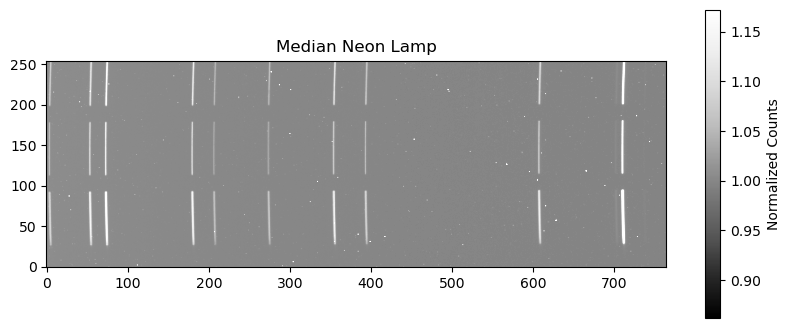

In [33]:
### Plot of the master flat-field
plt.figure(figsize=(10,4))
plt.imshow(imagedata_nem, cmap='Greys_r',norm=ImageNormalize(imagedata_ffS, interval=ZScaleInterval()),origin='lower')
plt.colorbar(label='Normalized Counts')
plt.title('Median Neon Lamp')

#### 3.2. Calibrated Neon Lamp

In [34]:
### Read Neo and other master file
ne_med = fits.open('New_ne_lamp_median_unor.fits')
df_ksi_med = fits.open('ksiper/darkframe/df_median_ksiper.fits')
ff_nor = fits.open('flat_field/newff_median_unor.fits')
imagedata_df_nor = df_ksi_med[0].data
imagedata_ff_nor = ff_nor[0].data
imagedata_ne_nor = ne_med[0].data


with np.errstate(divide='ignore', invalid='ignore'):
    calibrated_neon = (imagedata_ne_nor - imagedata_df_nor)/(imagedata_ff_nor-imagedata_df_nor)
    calibrated_neon[imagedata_ff_nor == 0] = 0
    calibrated_neon[calibrated_neon < 0.005] = 0


hdu = fits.PrimaryHDU(calibrated_neon)
hdulist = fits.HDUList([hdu])
hdulist.writeto('calibrated_neon.fits', overwrite=True)


imagedata_ne_c = hdu.data
imagedata_ne_c.shape 


(255, 765)

Text(0.5, 1.0, 'Calibrated Neon Lamp')

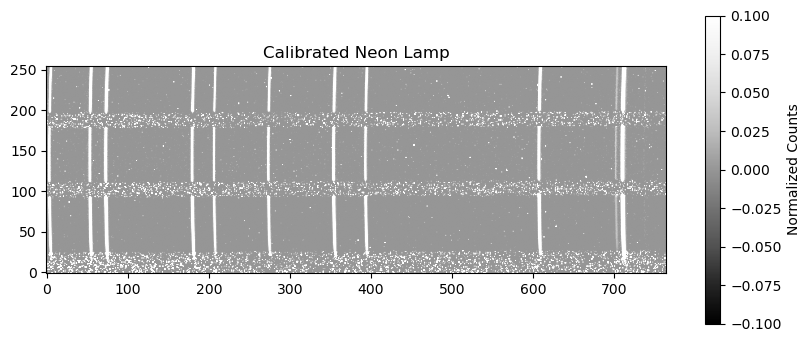

In [35]:
### Plot of the master flat-field
plt.figure(figsize=(10,4))
plt.imshow(imagedata_ne_c, cmap='Greys_r',norm=ImageNormalize(imagedata_ne_c, interval=ZScaleInterval()),origin='lower')
plt.colorbar(label='Normalized Counts')
plt.title('Calibrated Neon Lamp')

#### 3.4. Spectroscopic Calibration

#### The middle one corresponds to the $25\mathcal{\mu m}$.

#### 3.4.1 Collapse the flat-field from 2d to 1d

In [36]:
### Import related Packages
from ccdproc import Combiner

import matplotlib.pyplot as plt
from astropy.nddata import CCDData
import astropy.io
from astropy.io import fits

from astropy.visualization import hist
import numpy as np
import numpy

from matplotlib import image
from PIL import Image


import sys
np.set_printoptions(threshold=sys.maxsize)

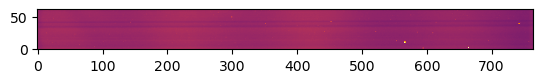

In [37]:
#4.4.2
spectrum_flatfield = CCDData.read('flat_field/newff_median.fits', unit='adu')
#2D Array
spectrum_flatfield_crop = spectrum_flatfield.data[116:178, :]
#print(np.shape(spectrum_flatfield_crop))
#1D Array
median = np.median(spectrum_flatfield_crop, axis=0)
#print(median)

spectrum_flats_crop = fits.PrimaryHDU(spectrum_flatfield_crop)
spectrum_flats_crop = fits.HDUList([spectrum_flats_crop])
spectrum_flats_crop.writeto('spectrum_flats_cropped.FIT', overwrite='True')

crop_spectrum_flat = CCDData.read('spectrum_flats_cropped.FIT', unit='adu')
plt.imshow(crop_spectrum_flat.data, cmap='inferno',norm=ImageNormalize(imagedata_ffS, interval=ZScaleInterval()),origin='lower')

Text(0, 0.5, 'Value of pixels')

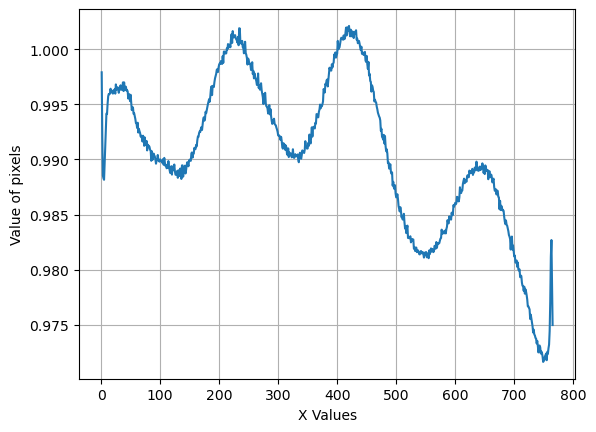

In [38]:
### Plot of the 1d flat-field values against the pixel positions along the dispersion axis.
x = np.linspace(1,765,765)
plt.plot(x, median)
plt.grid()
plt.xlabel('X Values')
plt.ylabel('Value of pixels')

#### 3.4.2

Text(0, 0.5, 'Value of pixels')

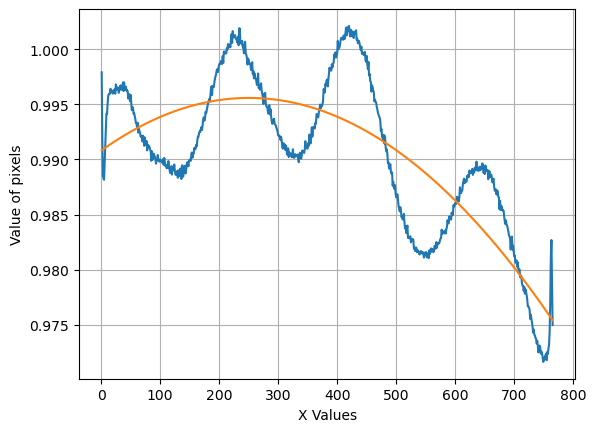

In [39]:
#4.4.3
x = np.linspace(1,765,765)
a, b, c = np.polyfit(x, median, deg = 2)
plt.plot(x, median)
plt.plot(x, a* x **2 + b * x + c)
plt.grid()
plt.xlabel('X Values')
plt.ylabel('Value of pixels')

#plot residual (adjust if curve)

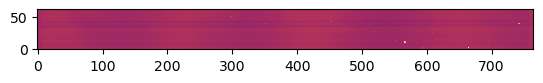

In [40]:
fitted_array = a* x **2 + b * x + c
norm_flats_crop = spectrum_flatfield_crop / fitted_array
#print(norm_flat_field)
plt.imshow(norm_flats_crop.data, cmap='inferno',norm=ImageNormalize(imagedata_ffS, interval=ZScaleInterval()),origin='lower')

norm_flats_crop1 = norm_flats_crop

norm_flats_crop = fits.PrimaryHDU(norm_flats_crop)
norm_flats_crop = fits.HDUList([norm_flats_crop])
norm_flats_crop.writeto('norm_flats_crop.FIT', overwrite='True')

#### 3.4.3 Lamp Spectrum

(62, 765)
47430


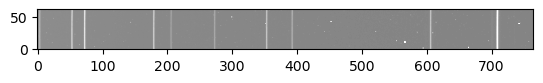

In [41]:
arclamp_spectrum = CCDData.read('New_ne_lamp_median.fits', unit='adu')
arclamp_spectrum_crop = arclamp_spectrum.data[116:178, :]
print(np.shape(arclamp_spectrum_crop))
#median = np.median(arclamp_spectrum_crop, axis=0)

print(np.size(arclamp_spectrum_crop.data))
normed_spec = arclamp_spectrum_crop.data/(a * x **2 + b * x + c)

arclamp_spectrum_crop1 = arclamp_spectrum_crop

arclamp_spectrum_crop = fits.PrimaryHDU(arclamp_spectrum_crop)
arclamp_spectrum_crop = fits.HDUList([arclamp_spectrum_crop])
arclamp_spectrum_crop.writeto('arclamp_spectrum_crop_cropped.FIT', overwrite='True')

crop_arclamp_spectrum_flat = CCDData.read('arclamp_spectrum_crop_cropped.FIT', unit='adu')
plt.imshow(crop_arclamp_spectrum_flat.data, cmap='Greys_r',norm=ImageNormalize(imagedata_ffS, interval=ZScaleInterval()),origin='lower')

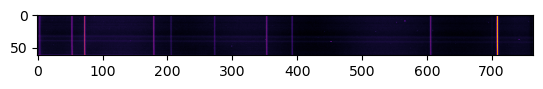

In [42]:
norm_arclamp_spectrum = arclamp_spectrum_crop1 / norm_flats_crop1
plt.imshow(norm_arclamp_spectrum.data, cmap='inferno')
arclamp_spectrum_crop.writeto('norm_arclamp_spectrum.FIT', overwrite='True')

#### 3.4.4 Wavelength Calibration

In [43]:
# remember to pip3 install tabulate
import tabulate
#from ccdproc import Combiner

import matplotlib.pyplot as plt
from astropy.nddata import CCDData
import astropy.io
from astropy.io import fits

from astropy.visualization import hist
import numpy as np
import numpy

from matplotlib import image
from PIL import Image


import sys
np.set_printoptions(threshold=sys.maxsize)

In [73]:
table = [
["5.0403","633.443"],
["55.0959","638.299"],
["74.3526","640.225"],
["180.9540","650.653"],
["208.025","653.288"],
["275.005","659.895"],
["355.372","667.828"],
["394.443","671.704"],
["607.95", "692.947"],
["711.055", "703.241"],
]

pixel_locs = [5.0403, 55.0959, 74.3526, 180.954, 208.025, 275.005, 355.372, 394.443, 607.95, 711.055]
pixel_locs = np.array(pixel_locs)
wavelength_locs = [633.443, 638.299, 640.225, 650.653, 653.288, 659.895, 667.828,671.704,692.947,703.241]
wavelength_locs = np.array(wavelength_locs)

headers = ["pixel location", "wavelength (nm)"]

print(tabulate.tabulate(table, headers, tablefmt="grid"))

+------------------+-------------------+
|   pixel location |   wavelength (nm) |
+==================+===================+
|           5.0403 |           633.443 |
+------------------+-------------------+
|          55.0959 |           638.299 |
+------------------+-------------------+
|          74.3526 |           640.225 |
+------------------+-------------------+
|         180.954  |           650.653 |
+------------------+-------------------+
|         208.025  |           653.288 |
+------------------+-------------------+
|         275.005  |           659.895 |
+------------------+-------------------+
|         355.372  |           667.828 |
+------------------+-------------------+
|         394.443  |           671.704 |
+------------------+-------------------+
|         607.95   |           692.947 |
+------------------+-------------------+
|         711.055  |           703.241 |
+------------------+-------------------+


632.8051624306621 0.09886376992729044


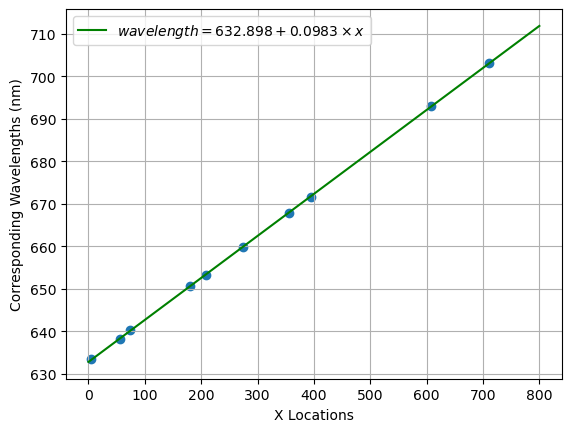

In [74]:
plt.grid()
plt.scatter(pixel_locs, wavelength_locs)

b, a = np.polyfit(pixel_locs, wavelength_locs, deg=1)
x = np.linspace(0, 800)
plt.plot(x, a + b * x, color="green",label=rf'$wavelength=632.898+0.0983\times x$')


plt.xlabel("X Locations")
plt.ylabel('Corresponding Wavelengths (nm)')
plt.legend()
print(a,b)

In [75]:
wavelength = 632.8025534140723 + pixel_locs * 0.098869420980368

In [76]:
#spectrum is approx 765 pixels wide, meaning it covers wavelenghts:
lower_wavelength = 632.8025534140723 + 0 * 0.098869420980368
upper_wavelength = 632.8025534140723 + 765 * 0.098869420980368
print(f'The spectrum covers wavelengths {lower_wavelength} nm to {upper_wavelength} nm')
print(f'or {upper_wavelength - lower_wavelength} nm total. This is {(upper_wavelength - lower_wavelength) * 10} angstrom.')

The spectrum covers wavelengths 632.8025534140723 nm to 708.4376604640538 nm
or 75.63510704998146 nm total. This is 756.3510704998146 angstrom.


#### 3.4.4 Plot the calibrated spectrum, labelling a few of the Neon Emission Lines

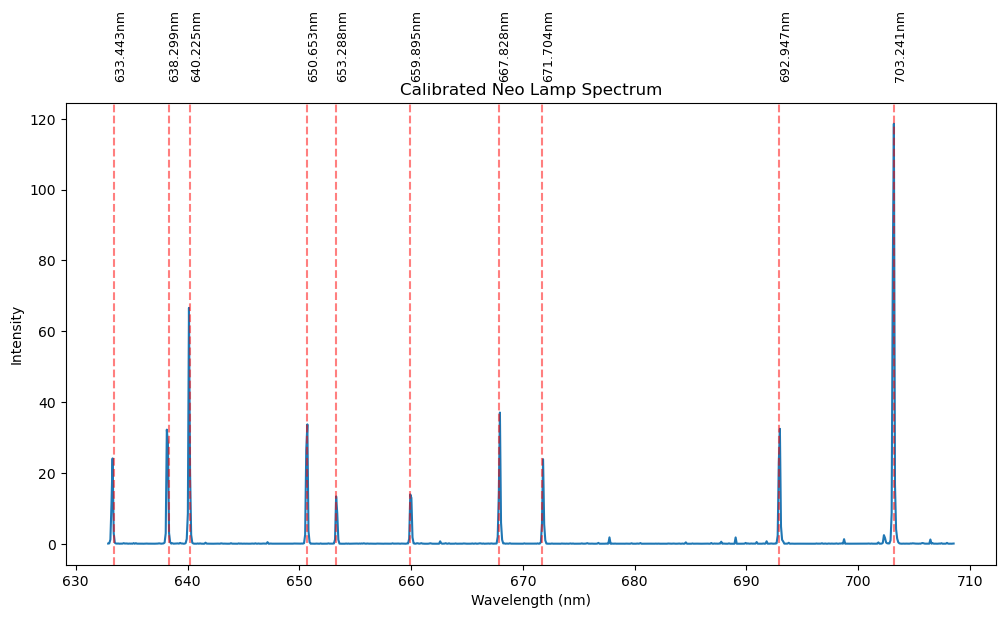

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

cali_neon = CCDData.read('calibrated_neon.fits', unit='adu')
cali_neon_crop = cali_neon.data[116:178, :]

cali_neon_crop = fits.PrimaryHDU(cali_neon_crop)
cali_neon_crop = fits.HDUList([cali_neon_crop])
cali_neon_crop.writeto('cali_neon_cropped.FIT', overwrite='True')

with fits.open('cali_neon_cropped.FIT') as hdulist:
    spectrum_data = hdulist[0].data

if len(spectrum_data.shape) == 2:
    spectrum_data = np.sum(spectrum_data, axis=0)

pixel_positions = np.array([2.5403, 50.5959, 74.0526, 180.954, 208.025, 275.005, 355.372, 394.443, 607.95, 705.055])
wavelengths = np.array([633.443, 638.299, 640.225, 650.653, 653.288, 659.895, 667.828,671.704,692.947,703.241])

coefficients = np.polyfit(pixel_positions, wavelengths, 1)
fit_function = np.poly1d(coefficients)

calibrated_wavelengths = fit_function(np.arange(len(spectrum_data)))

plt.figure(figsize=(12, 6))
plt.plot(calibrated_wavelengths, spectrum_data)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Calibrated Neo Lamp Spectrum')

for line in wavelengths:
    plt.axvline(x=line, color='red', linestyle='--', alpha=0.5)
    plt.text(line, 1.1*np.max(spectrum_data), f"{line}nm", rotation=90, verticalalignment='bottom', fontsize=9)

plt.show()

### 4. Science Image: $\gamma$ Cas

In [49]:
### Read Gam and other master file
gam_med = fits.open('lab3/GamCas/primary.FIT')
df_gam_med = fits.open('gamcas/darkframe/df_median.fits')
ff_nor = fits.open('flat_field/newff_median_unor.fits')
imagedata_df_nor = df_gam_med[0].data
imagedata_ff_nor = ff_nor[0].data
imagedata_gam_nor = gam_med[0].data


with np.errstate(divide='ignore', invalid='ignore'):
    calibrated_gam = (imagedata_gam_nor - imagedata_df_nor)/(imagedata_ff_nor-imagedata_df_nor)
    calibrated_gam[imagedata_ff_nor == 0] = 0
    #calibrated_neon[calibrated_neon < 0.005] = 0


hdu = fits.PrimaryHDU(calibrated_gam)
hdulist = fits.HDUList([hdu])
hdulist.writeto('calibrated_gam.fits', overwrite=True)


imagedata_gam_c = hdu.data
imagedata_gam_c.shape 

(255, 765)

Plot Calibrated Gam Cas Image

Text(0.5, 1.0, 'Calibrated Gam Cas')

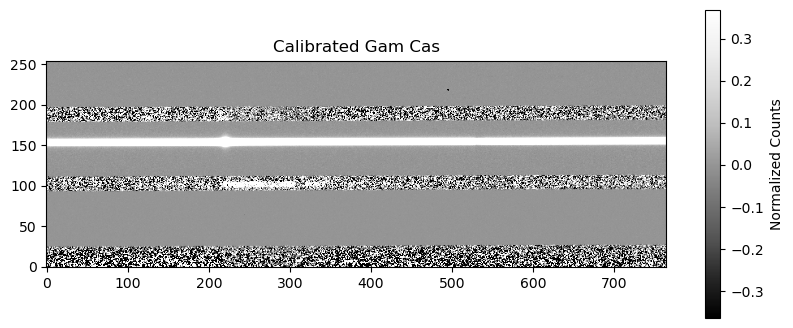

In [50]:
### Plot of the master flat-field
plt.figure(figsize=(10,4))
plt.imshow(imagedata_gam_c, cmap='Greys_r',norm=ImageNormalize(imagedata_gam_c, interval=ZScaleInterval()),origin='lower')
plt.colorbar(label='Normalized Counts')
plt.title('Calibrated Gam Cas')

Plot Spectrum of Gam Cas

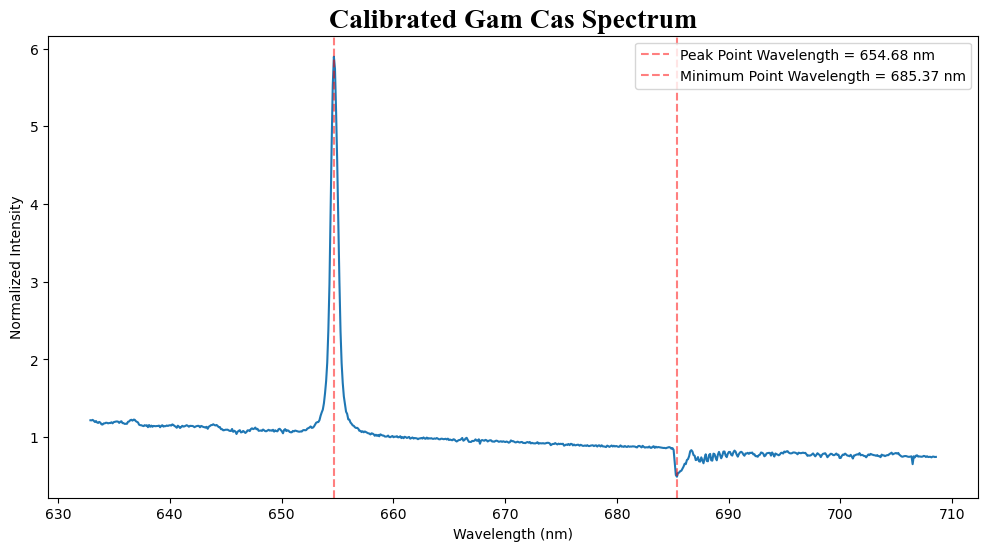

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

cali_gam = CCDData.read('calibrated_gam.fits', unit='adu')
cali_gam_crop = cali_gam.data[116:178, :]

cali_gam_crop = fits.PrimaryHDU(cali_gam_crop)
cali_gam_crop = fits.HDUList([cali_gam_crop])
cali_gam_crop.writeto('cali_gam_cropped.FIT', overwrite='True')

with fits.open('cali_gam_cropped.FIT') as hdulist:
    spectrum_data = hdulist[0].data

if len(spectrum_data.shape) == 2:
    spectrum_data = np.sum(spectrum_data, axis=0)

Avg_gam = np.mean(spectrum_data)

pixel_positions = np.array([2.5403, 50.5959, 74.0526, 180.954, 208.025, 275.005, 355.372, 394.443, 607.95, 705.055])
wavelengths = np.array([633.443, 638.299, 640.225, 650.653, 653.288, 659.895, 667.828,671.704,692.947,703.241])

coefficients = np.polyfit(pixel_positions, wavelengths, 1)
fit_function = np.poly1d(coefficients)

calibrated_wavelengths = fit_function(np.arange(len(spectrum_data)))

normalized_spectrum_data = spectrum_data / Avg_gam

peak_index = np.argmax(normalized_spectrum_data)
min_index = np.argmin(normalized_spectrum_data)

peak_wavelength = calibrated_wavelengths[peak_index]
min_wavelength = calibrated_wavelengths[min_index]

plt.figure(figsize=(12, 6))
plt.plot(calibrated_wavelengths, normalized_spectrum_data)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Intensity')
plt.title('Calibrated Gam Cas Spectrum',fontname="Times New Roman", size=20,fontweight="bold")
plt.axvline(x = peak_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Peak Point Wavelength = {peak_wavelength:.5} nm')
plt.axvline(x = min_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Minimum Point Wavelength = {min_wavelength:.5} nm')
plt.legend(loc=1)


#for line in wavelengths:
#    plt.axvline(x=line, color='red', linestyle='--', alpha=0.5)
#    plt.text(line, 1.1*np.max(spectrum_data), f"{line}nm", rotation=90, verticalalignment='bottom', fontsize=9)

plt.show()

Plot reference observation

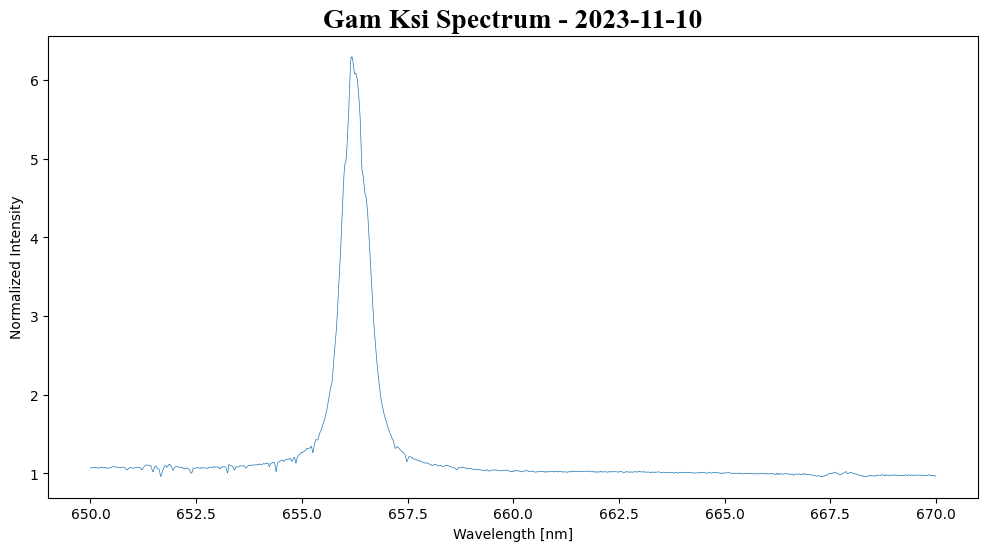

In [138]:
hdulist_r = fits.open('otherob/_gamcas_20231110_699.fits')

# Access the data and header
data = hdulist_r[0].data
header = hdulist_r[0].header

# Extracting wavelength information
crval1 = header['CRVAL1']  # Starting wavelength
cdelt1 = header['CDELT1']  # Wavelength change per pixel

# Generating wavelength array
num_pixels = header['NAXIS1']
wavelength = crval1 + (np.arange(num_pixels) + 1 - header['CRPIX1']) * cdelt1



plt.figure(figsize=(12, 6))
plt.plot(wavelength/10, data, lw=0.5)
plt.xlabel(header['CTYPE1'] + ' [nm]')
plt.ylabel('Normalized Intensity')
plt.title('Gam Ksi Spectrum - 2023-11-10',fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

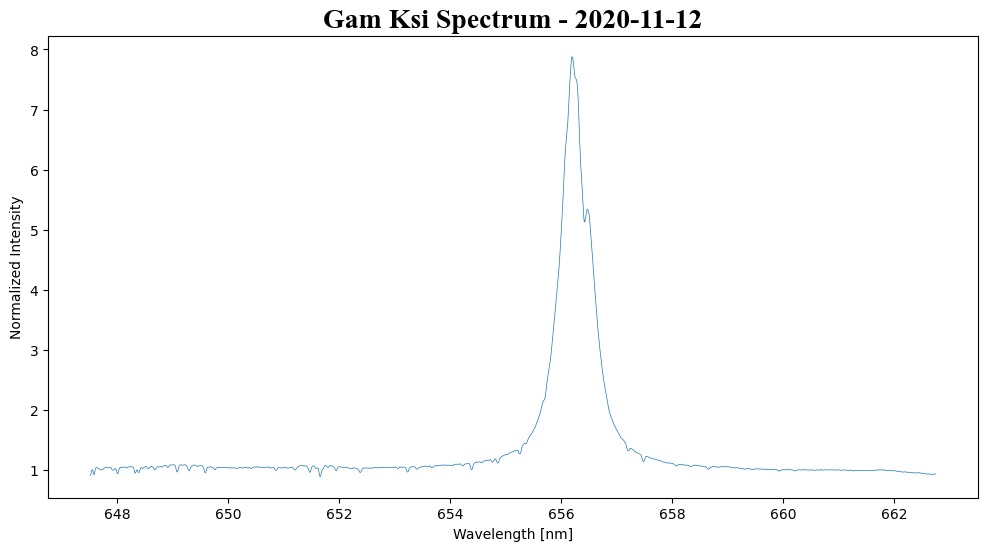

In [139]:
hdulist_r_1 = fits.open('otherob/bess_gamCas--20201112_9264.fits')

# Access the data and header
data_p = hdulist_r_1[0].data
header = hdulist_r_1[0].header

# Extracting wavelength information
crval1 = header['CRVAL1']  # Starting wavelength
cdelt1 = header['CDELT1']  # Wavelength change per pixel

# Generating wavelength array
num_pixels = header['NAXIS1']
wavelength_p = crval1 + (np.arange(num_pixels) + 1 - header['CRPIX1']) * cdelt1



plt.figure(figsize=(12, 6))
plt.plot(wavelength_p/10, data_p, lw=0.5)
plt.xlabel(header['CTYPE1'] + ' [nm]')
plt.ylabel('Normalized Intensity')
plt.title('Gam Ksi Spectrum - 2020-11-12',fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

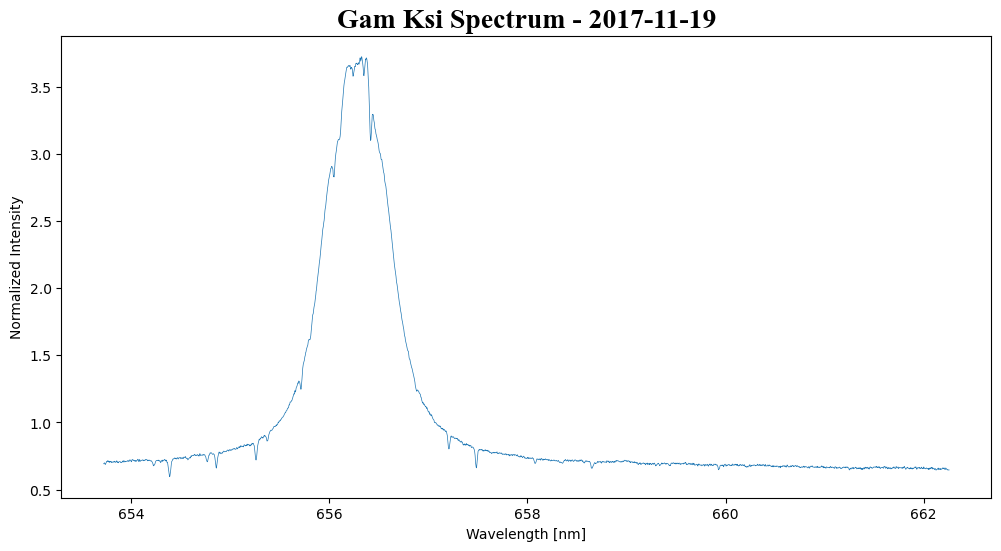

In [140]:
hdulist_r_2 = fits.open('otherob/_gammacas_20171119_741_25.fits')

# Access the data and header
data_o = hdulist_r_2[0].data
header = hdulist_r_2[0].header

# Extracting wavelength information
crval1 = header['CRVAL1']  # Starting wavelength
cdelt1 = header['CDELT1']  # Wavelength change per pixel

# Generating wavelength array
num_pixels = header['NAXIS1']
wavelength_o = crval1 + (np.arange(num_pixels) + 1 - header['CRPIX1']) * cdelt1



plt.figure(figsize=(12, 6))
plt.plot(wavelength_o/10, data_o, lw=0.5)
plt.xlabel(header['CTYPE1'] + ' [nm]')
plt.ylabel('Normalized Intensity')
plt.title('Gam Ksi Spectrum - 2017-11-19',fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

Divide the image into two parts

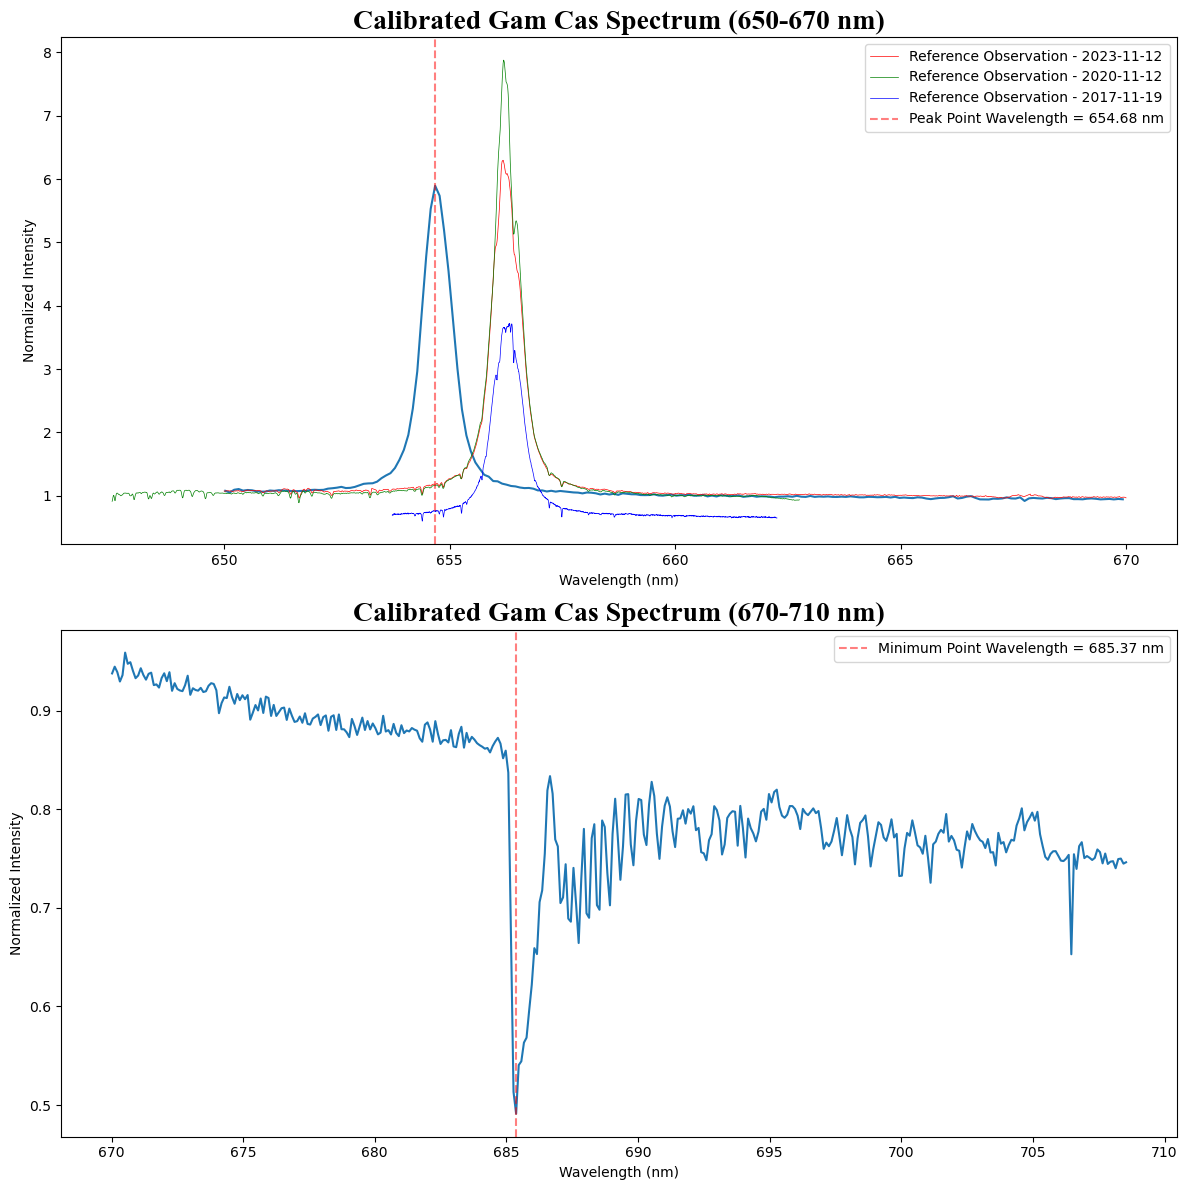

In [141]:
normalized_spectrum_data = spectrum_data / Avg_gam
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# First plot: 630-670 nm
mask1 = (calibrated_wavelengths >= 650) & (calibrated_wavelengths <= 670)
axs[0].plot(calibrated_wavelengths[mask1], normalized_spectrum_data[mask1])
axs[0].plot(wavelength/10, data, lw=0.5, color = 'red', label='Reference Observation - 2023-11-12')
axs[0].plot(wavelength_p/10, data_p, lw=0.5, color = 'green', label='Reference Observation - 2020-11-12')
axs[0].plot(wavelength_o/10, data_o, lw=0.5, color = 'blue', label='Reference Observation - 2017-11-19')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Normalized Intensity')
axs[0].set_title('Calibrated Gam Cas Spectrum (650-670 nm)',fontname="Times New Roman", size=20,fontweight="bold")
axs[0].axvline(x = peak_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Peak Point Wavelength = {peak_wavelength:.5} nm')

# Second plot: 670-710 nm
mask2 = (calibrated_wavelengths >= 670) & (calibrated_wavelengths <= 710)
axs[1].plot(calibrated_wavelengths[mask2], normalized_spectrum_data[mask2])
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Normalized Intensity')
axs[1].set_title('Calibrated Gam Cas Spectrum (670-710 nm)',fontname="Times New Roman", size=20,fontweight="bold")
axs[1].axvline(x = min_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Minimum Point Wavelength = {min_wavelength:.5} nm')


# Add legends
axs[0].legend()
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

### 5. Science Image: Ksi Per

#### 5.1 Take median of Best 5 Images

In [53]:
ksi_list = []
imagedata_ksi_list = []
median_ksi_list = []
ksi_cv_list = []

for i in range(5):
    filename = f'lab3/KsiPer/Pretty/lab3_science_spectra_ksii.0{i}.FIT'
    ksi = fits.open(filename)
    ksi_list.append(ksi)
    ### get image data of each
    imagedata_ksi = ksi[0].data
    imagedata_ksi_list.append(imagedata_ksi)
    header = ksi[0].header
    ### Convert 2d array into 1d array
    ksi_cv=imagedata_ksi.flatten()
    ksi_cv_list.append(ksi_cv)
    ### get median of Fits file
    median_ksi = np.median(ksi_cv)
    median_ksi_list.append(median_ksi)


### Add them up and get their median (same as dark frame)
sum_of_imagedatas_ksi = np.sum(imagedata_ksi_list, axis=0)
allimages_ksi = np.array(imagedata_ksi_list)
master_ksi = np.mean(allimages_ksi, axis=0)
# avg_image_ff.shape

### Rewrite it into a new Fits file
new_ksi = fits.PrimaryHDU(master_ksi)
new_ksi.writeto('ksi_median.fits', overwrite=True)

imagedata_ksi = new_ksi.data
imagedata_ksi.shape 

(255, 765)

Text(0.5, 1.0, 'Calibrated Ksi Per')

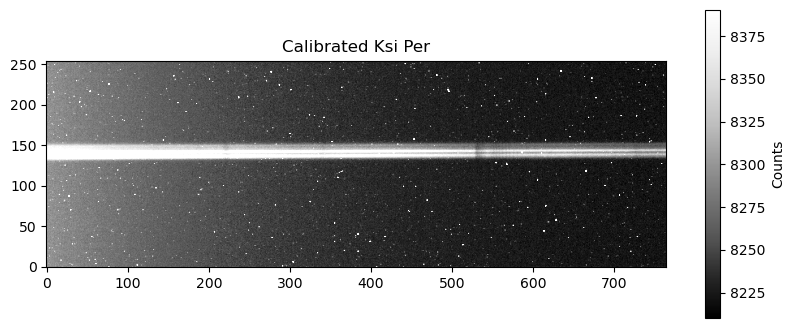

In [54]:
### Plot of the median
plt.figure(figsize=(10,4))
plt.imshow(imagedata_ksi, cmap='Greys_r',norm=ImageNormalize(imagedata_ksi, interval=ZScaleInterval()),origin='lower')
plt.colorbar(label='Counts')
plt.title('Calibrated Ksi Per')

#### 5.2 Calibrate Median Image

In [55]:
### Read Gam and other master file
ksi_med = fits.open('ksi_median.fits')
df_ksi_med = fits.open('ksiper/darkframe/df_median_ksiper.fits')
ff = fits.open('flat_field/newff_median_unor.fits')
imagedata_df = df_ksi_med[0].data
imagedata_ff = ff[0].data
imagedata_ksi = ksi_med[0].data


with np.errstate(divide='ignore', invalid='ignore'):
    calibrated_ksi = (imagedata_ksi - imagedata_df)/(imagedata_ff-imagedata_df)
    calibrated_ksi[imagedata_ff == 0] = 0
    #calibrated_neon[calibrated_neon < 0.005] = 0


hdu = fits.PrimaryHDU(calibrated_ksi)
hdulist = fits.HDUList([hdu])
hdulist.writeto('calibrated_ksi.fits', overwrite=True)


imagedata_ksi_c = hdu.data
imagedata_ksi_c.shape 

(255, 765)

Text(0.5, 1.0, 'Calibrated Ksi Per')

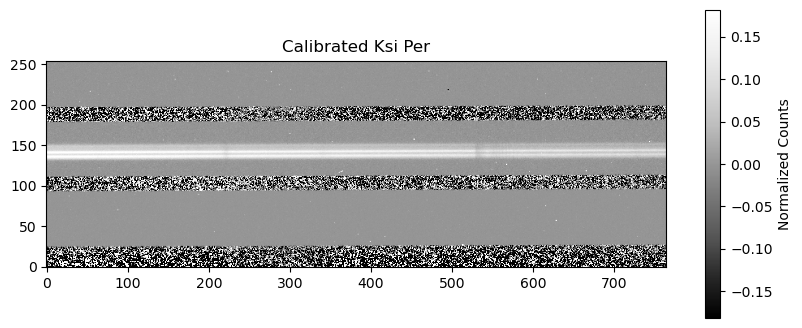

In [56]:
### Plot of the master flat-field
plt.figure(figsize=(10,4))
plt.imshow(imagedata_ksi_c, cmap='Greys_r',norm=ImageNormalize(imagedata_ksi_c, interval=ZScaleInterval()),origin='lower')
plt.colorbar(label='Normalized Counts')
plt.title('Calibrated Ksi Per')

#### 5.3 Plot the Spectrum of Ksi Per

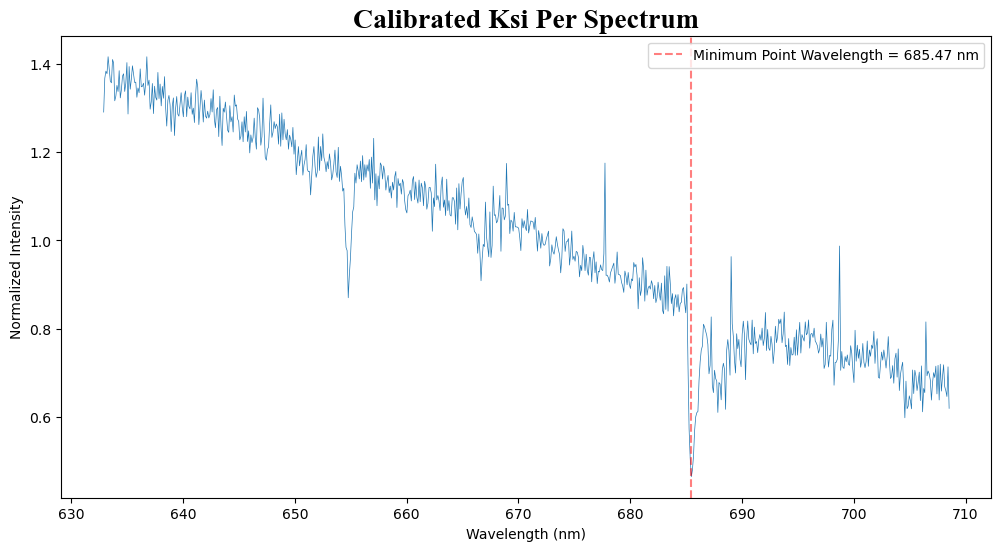

In [121]:
cali_ksi = CCDData.read('calibrated_ksi.fits', unit='adu')
cali_ksi_crop = cali_ksi.data[116:178, :]

cali_ksi_crop = fits.PrimaryHDU(cali_ksi_crop)
cali_ksi_crop = fits.HDUList([cali_ksi_crop])
cali_ksi_crop.writeto('cali_ksi_cropped.FIT', overwrite='True')

with fits.open('cali_ksi_cropped.FIT') as hdulist:
    spectrum_data = hdulist[0].data

if len(spectrum_data.shape) == 2:
    spectrum_data = np.sum(spectrum_data, axis=0)

Avg_ksi = np.mean(spectrum_data)

pixel_positions = np.array([2.5403, 50.5959, 74.0526, 180.954, 208.025, 275.005, 355.372, 394.443, 607.95, 705.055])
wavelengths = np.array([633.443, 638.299, 640.225, 650.653, 653.288, 659.895, 667.828,671.704,692.947,703.241])

coefficients = np.polyfit(pixel_positions, wavelengths, 1)
fit_function = np.poly1d(coefficients)

calibrated_wavelengths = fit_function(np.arange(len(spectrum_data)))

normalized_spectrum_data = spectrum_data / Avg_ksi

peak_index = np.argmax(normalized_spectrum_data)
min_index = np.argmin(normalized_spectrum_data)

peak_wavelength = calibrated_wavelengths[peak_index]
min_wavelength = calibrated_wavelengths[min_index]

plt.figure(figsize=(12, 6))
plt.plot(calibrated_wavelengths, normalized_spectrum_data, lw=0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Intensity')
plt.title('Calibrated Ksi Per Spectrum',fontname="Times New Roman", size=20,fontweight="bold")
#plt.axvline(x = peak_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Peak Point Wavelength = {peak_wavelength:.5} nm')
plt.axvline(x = min_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Minimum Point Wavelength = {min_wavelength:.5} nm')
plt.legend(loc=1)
plt.show()

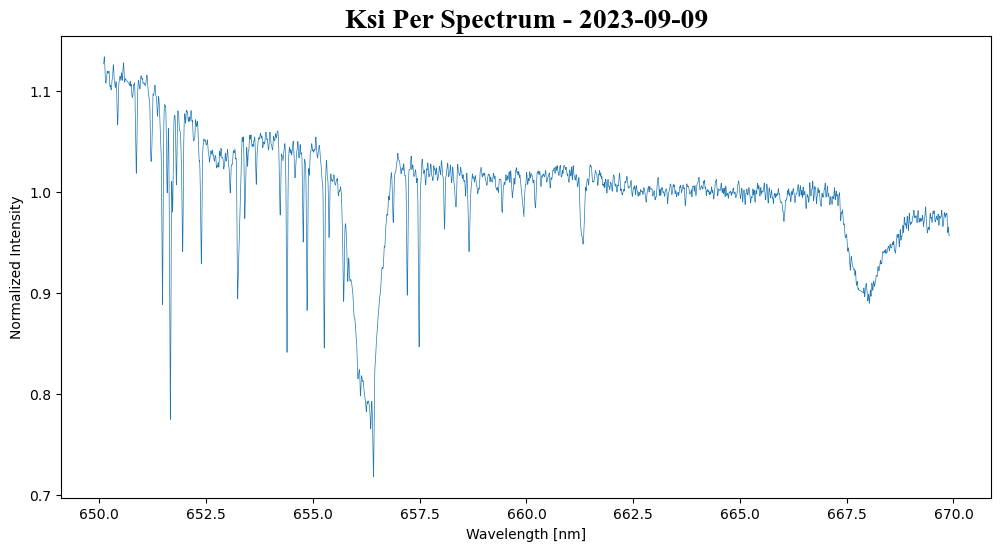

In [122]:
hdulist_ksi_per_r_1 = fits.open('otherob/ksiper/_ksiper_20230909_991.fits')

# Access the data and header
data_k_1 = hdulist_ksi_per_r_1[0].data
header = hdulist_ksi_per_r_1[0].header

# Extracting wavelength information
crval1 = header['CRVAL1']  # Starting wavelength
cdelt1 = header['CDELT1']  # Wavelength change per pixel

# Generating wavelength array
num_pixels = header['NAXIS1']
wavelength_k_1 = crval1 + (np.arange(num_pixels) + 1 - header['CRPIX1']) * cdelt1



plt.figure(figsize=(12, 6))
plt.plot(wavelength_k_1/10, data_k_1, lw=0.5)
plt.xlabel(header['CTYPE1'] + ' [nm]')
plt.ylabel('Normalized Intensity')
plt.title('Ksi Per Spectrum - 2023-09-09',fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

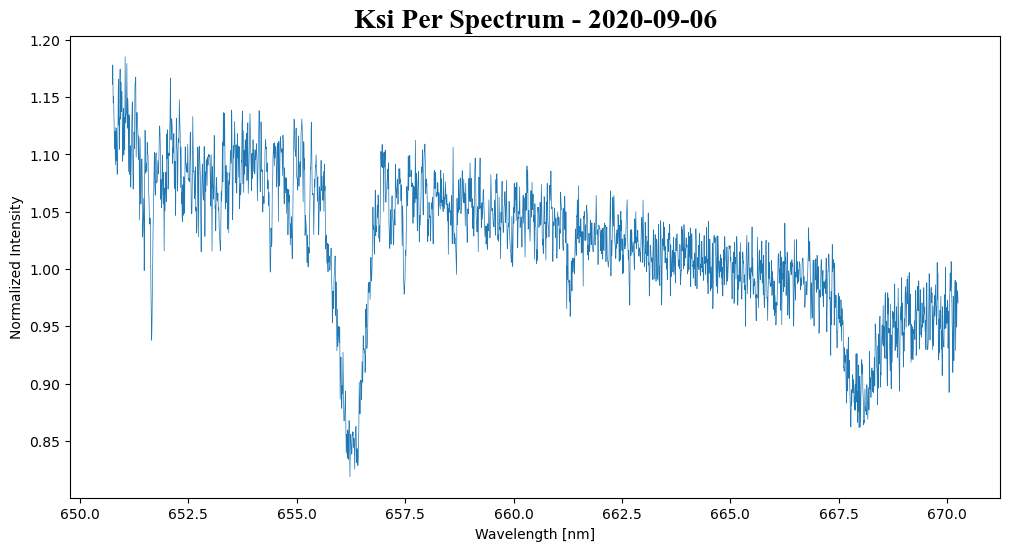

In [124]:
hdulist_ksi_per_r_2 = fits.open('otherob/ksiper/_xiper_20200906_163_34.fits')

# Access the data and header
data_k_2 = hdulist_ksi_per_r_2[0].data
header = hdulist_ksi_per_r_2[0].header

# Extracting wavelength information
crval1 = header['CRVAL1']  # Starting wavelength
cdelt1 = header['CDELT1']  # Wavelength change per pixel

# Generating wavelength array
num_pixels = header['NAXIS1']
wavelength_k_2 = crval1 + (np.arange(num_pixels) + 1 - header['CRPIX1']) * cdelt1



plt.figure(figsize=(12, 6))
plt.plot(wavelength_k_2/10, data_k_2, lw=0.5)
plt.xlabel(header['CTYPE1'] + ' [nm]')
plt.ylabel('Normalized Intensity')
plt.title('Ksi Per Spectrum - 2020-09-06',fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

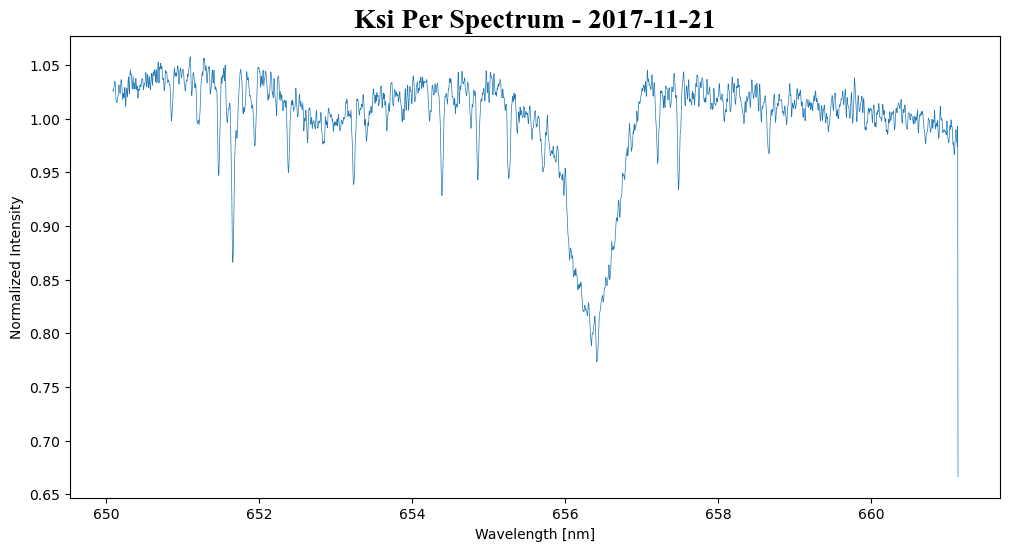

In [127]:
hdulist_ksi_per_r_3 = fits.open('otherob/ksiper/_hd24912_20171121_036_EBE.fits')

# Access the data and header
data_k_3 = hdulist_ksi_per_r_3[0].data
header = hdulist_ksi_per_r_3[0].header

# Extracting wavelength information
crval1 = header['CRVAL1']  # Starting wavelength
cdelt1 = header['CDELT1']  # Wavelength change per pixel

# Generating wavelength array
num_pixels = header['NAXIS1']
wavelength_k_3 = crval1 + (np.arange(num_pixels) + 1 - header['CRPIX1']) * cdelt1



plt.figure(figsize=(12, 6))
plt.plot(wavelength_k_3/10, data_k_3, lw=0.5)
plt.xlabel(header['CTYPE1'] + ' [nm]')
plt.ylabel('Normalized Intensity')
plt.title('Ksi Per Spectrum - 2017-11-21',fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

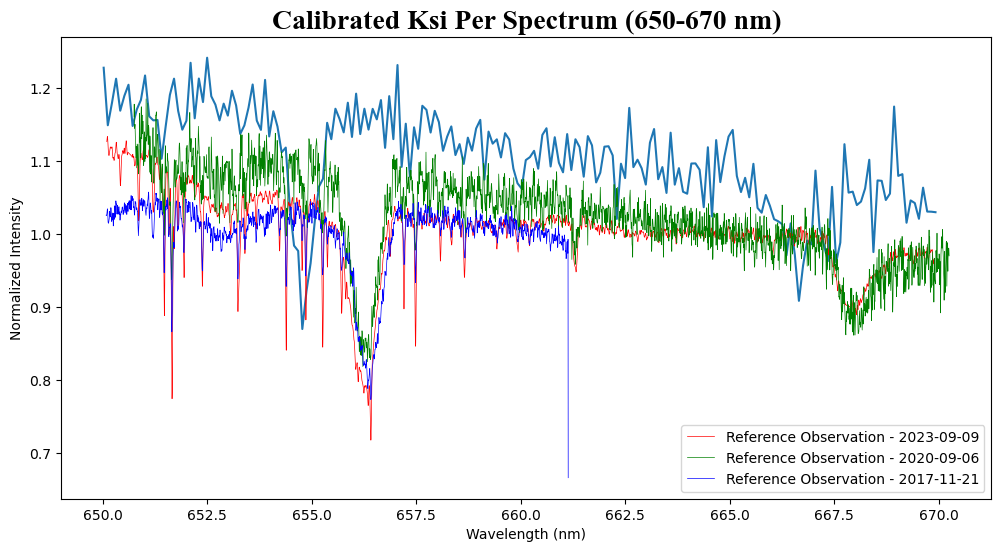

In [135]:
plt.figure(figsize=(12, 6))

mask1 = (calibrated_wavelengths >= 650) & (calibrated_wavelengths <= 670)
plt.plot(calibrated_wavelengths[mask1], normalized_spectrum_data[mask1])
plt.plot(wavelength_k_1/10, data_k_1, lw=0.5, color = 'red', label='Reference Observation - 2023-09-09')
plt.plot(wavelength_k_2/10, data_k_2, lw=0.5, color = 'green', label='Reference Observation - 2020-09-06')
plt.plot(wavelength_k_3/10, data_k_3, lw=0.5, color = 'blue', label='Reference Observation - 2017-11-21')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Intensity')
plt.title('Calibrated Ksi Per Spectrum (650-670 nm)',fontname="Times New Roman", size=20,fontweight="bold")
plt.legend()

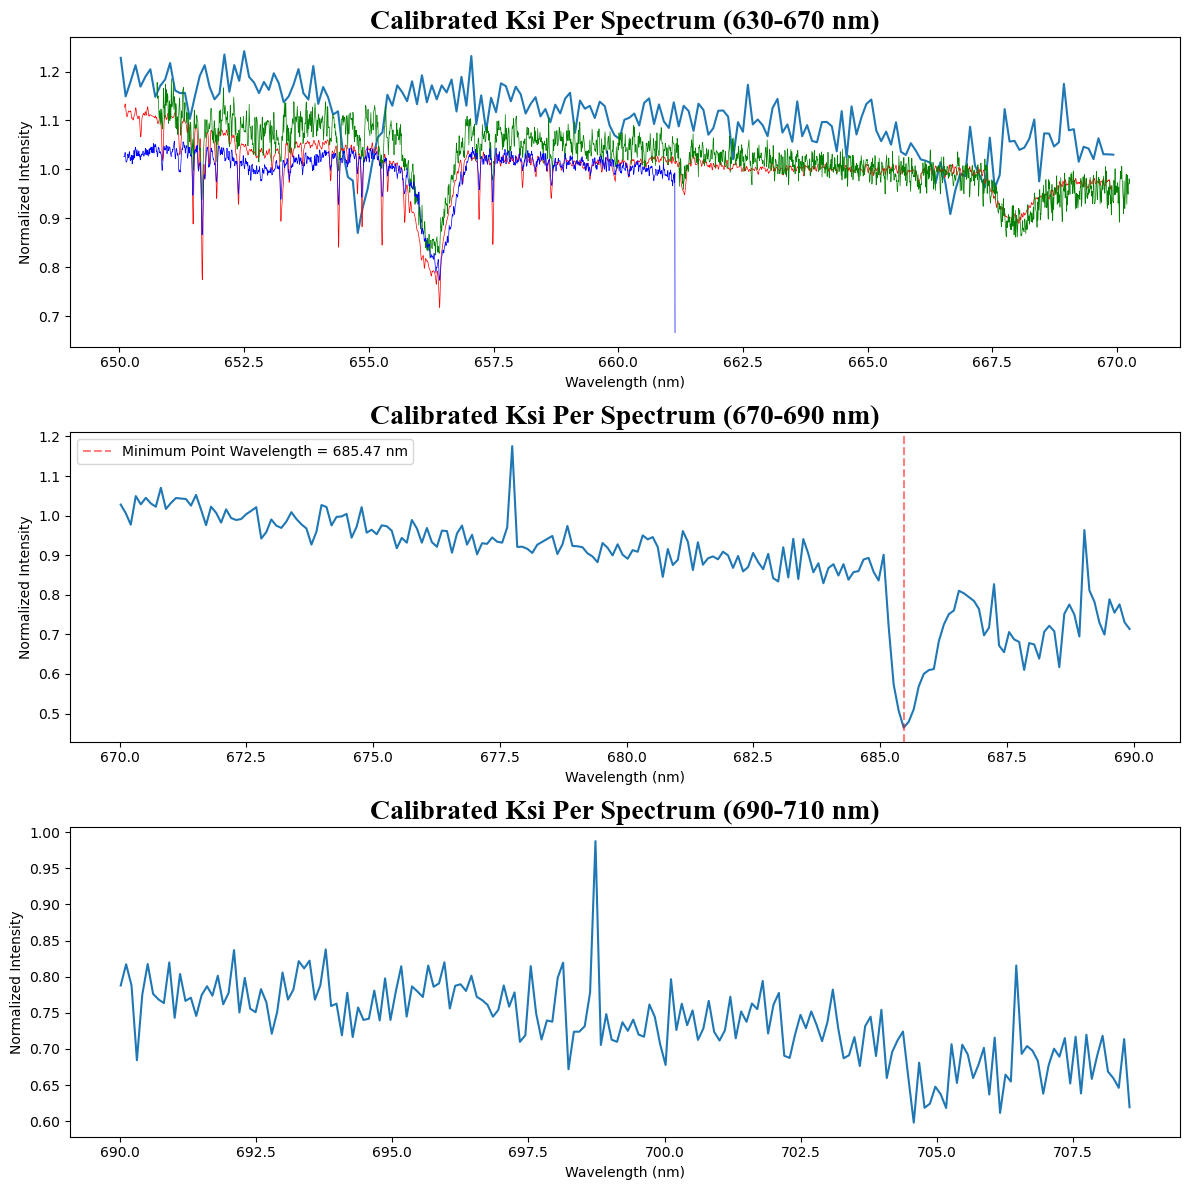

In [128]:


# First plot: 630-670 nm
mask1 = (calibrated_wavelengths >= 650) & (calibrated_wavelengths <= 670)
axs[0].plot(calibrated_wavelengths[mask1], normalized_spectrum_data[mask1])
axs[0].plot(wavelength_k_1/10, data_k_1, lw=0.5, color = 'red', label='Reference Observation - 2023-09-09')
axs[0].plot(wavelength_k_2/10, data_k_2, lw=0.5, color = 'green', label='Reference Observation - 2020-09-06')
axs[0].plot(wavelength_k_3/10, data_k_3, lw=0.5, color = 'blue', label='Reference Observation - 2017-11-21')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Normalized Intensity')
axs[0].set_title('Calibrated Ksi Per Spectrum (650-670 nm)',fontname="Times New Roman", size=20,fontweight="bold")
#axs[0].axvline(x = peak_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Peak Point Wavelength = {peak_wavelength:.5} nm')

# Second plot: 670-690 nm
mask2 = (calibrated_wavelengths >= 670) & (calibrated_wavelengths <= 690)
axs[1].plot(calibrated_wavelengths[mask2], normalized_spectrum_data[mask2])
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Normalized Intensity')
axs[1].set_title('Calibrated Ksi Per Spectrum (670-690 nm)',fontname="Times New Roman", size=20,fontweight="bold")
#axs[1].axvline(x = peak_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Peak Point Wavelength = {peak_wavelength:.5} nm')
axs[1].axvline(x = min_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Minimum Point Wavelength = {min_wavelength:.5} nm')

# Third plot: 690-710 nm
mask3 = (calibrated_wavelengths >= 690) & (calibrated_wavelengths <= 710)
axs[2].plot(calibrated_wavelengths[mask3], normalized_spectrum_data[mask3])
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('Normalized Intensity')
axs[2].set_title('Calibrated Ksi Per Spectrum (690-710 nm)',fontname="Times New Roman", size=20,fontweight="bold")
#axs[2].axvline(x = min_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Minimum Point Wavelength = {min_wavelength:.5} nm')
# Add legends

axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

#### 5.4 Calibrate Single Pretty Science Image of Ksi Per 

In [59]:
### Read Gam and other master file
ksi = fits.open('lab3/KsiPer/Pretty/lab3_science_spectra_ksii.03.FIT')
df_ksi_med = fits.open('ksiper/darkframe/df_median_ksiper.fits')
ff = fits.open('flat_field/newff_median_unor.fits')
imagedata_df = df_ksi_med[0].data
imagedata_ff = ff[0].data
imagedata_ksi = ksi[0].data


with np.errstate(divide='ignore', invalid='ignore'):
    calibrated_ksi = (imagedata_ksi - imagedata_df)/(imagedata_ff-imagedata_df)
    calibrated_ksi[imagedata_ff == 0] = 0
    #calibrated_neon[calibrated_neon < 0.005] = 0


hdu = fits.PrimaryHDU(calibrated_ksi)
hdulist = fits.HDUList([hdu])
hdulist.writeto('calibrated_ksi_03.fits', overwrite=True)


imagedata_ksi_03_c = hdu.data
imagedata_ksi_03_c.shape 

(255, 765)

Text(0.5, 1.0, 'Calibrated Ksi Per 01')

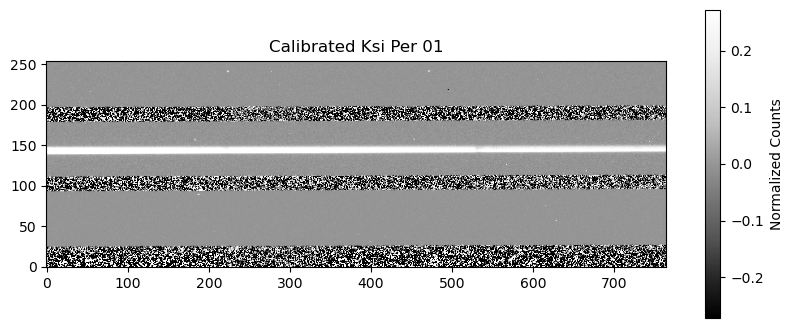

In [60]:
### Plot of the calibrated image
plt.figure(figsize=(10,4))
plt.imshow(imagedata_ksi_03_c, cmap='Greys_r',norm=ImageNormalize(imagedata_ksi_03_c, interval=ZScaleInterval()),origin='lower')
plt.colorbar(label='Normalized Counts')
plt.title('Calibrated Ksi Per 01')

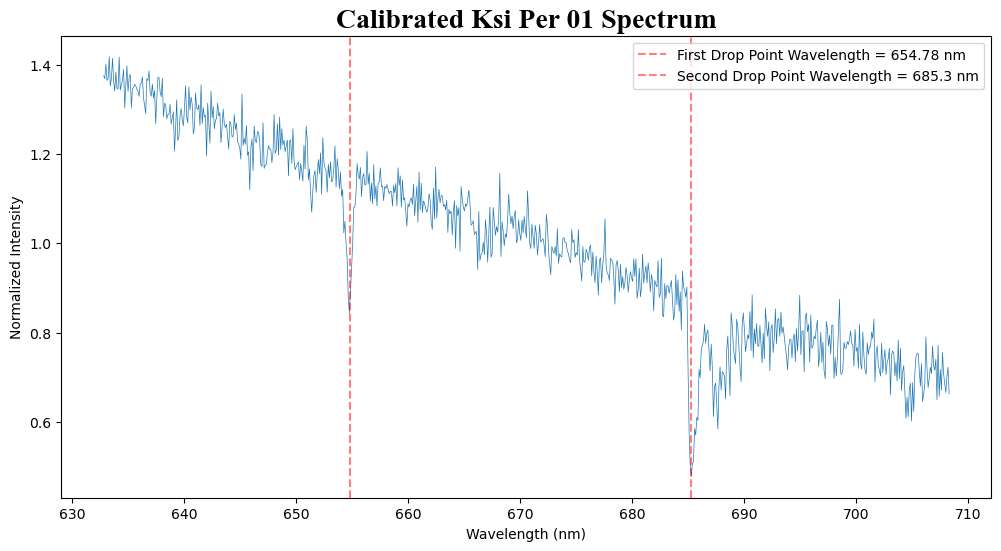

In [61]:
cali_ksi = CCDData.read('calibrated_ksi_03.fits', unit='adu')
cali_ksi_crop = cali_ksi.data[116:178, :]

cali_ksi_crop = fits.PrimaryHDU(cali_ksi_crop)
cali_ksi_crop = fits.HDUList([cali_ksi_crop])
cali_ksi_crop.writeto('cali_ksi_cropped_03.FIT', overwrite='True')

with fits.open('cali_ksi_cropped_03.FIT') as hdulist:
    spectrum_data = hdulist[0].data

if len(spectrum_data.shape) == 2:
    spectrum_data = np.sum(spectrum_data, axis=0)

Avg_ksi = np.mean(spectrum_data)

pixel_positions = np.array([5.1403, 55.0959, 74.3526, 180.954, 208.025, 275.005, 355.372, 394.443, 607.95, 711.055])
wavelengths = np.array([633.443, 638.299, 640.225, 650.653, 653.288, 659.895, 667.828,671.704,692.947,703.241])

coefficients = np.polyfit(pixel_positions, wavelengths, 1)
fit_function = np.poly1d(coefficients)

calibrated_wavelengths = fit_function(np.arange(len(spectrum_data)))

normalized_spectrum_data = spectrum_data / Avg_ksi

peak_index = np.argmax(normalized_spectrum_data)
min_index = np.argmin(normalized_spectrum_data)

peak_wavelength = calibrated_wavelengths[peak_index]
min_wavelength = calibrated_wavelengths[min_index]

plt.figure(figsize=(12, 6))
plt.plot(calibrated_wavelengths, normalized_spectrum_data, lw=0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Intensity')
plt.title('Calibrated Ksi Per 01 Spectrum',fontname="Times New Roman", size=20,fontweight="bold")
plt.axvline(x = 654.78, color = 'red', linestyle = '--', alpha =0.5, label=f'First Drop Point Wavelength = 654.78 nm')
plt.axvline(x = min_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Second Drop Point Wavelength = {min_wavelength:.5} nm')
plt.legend(loc=1)
plt.show()

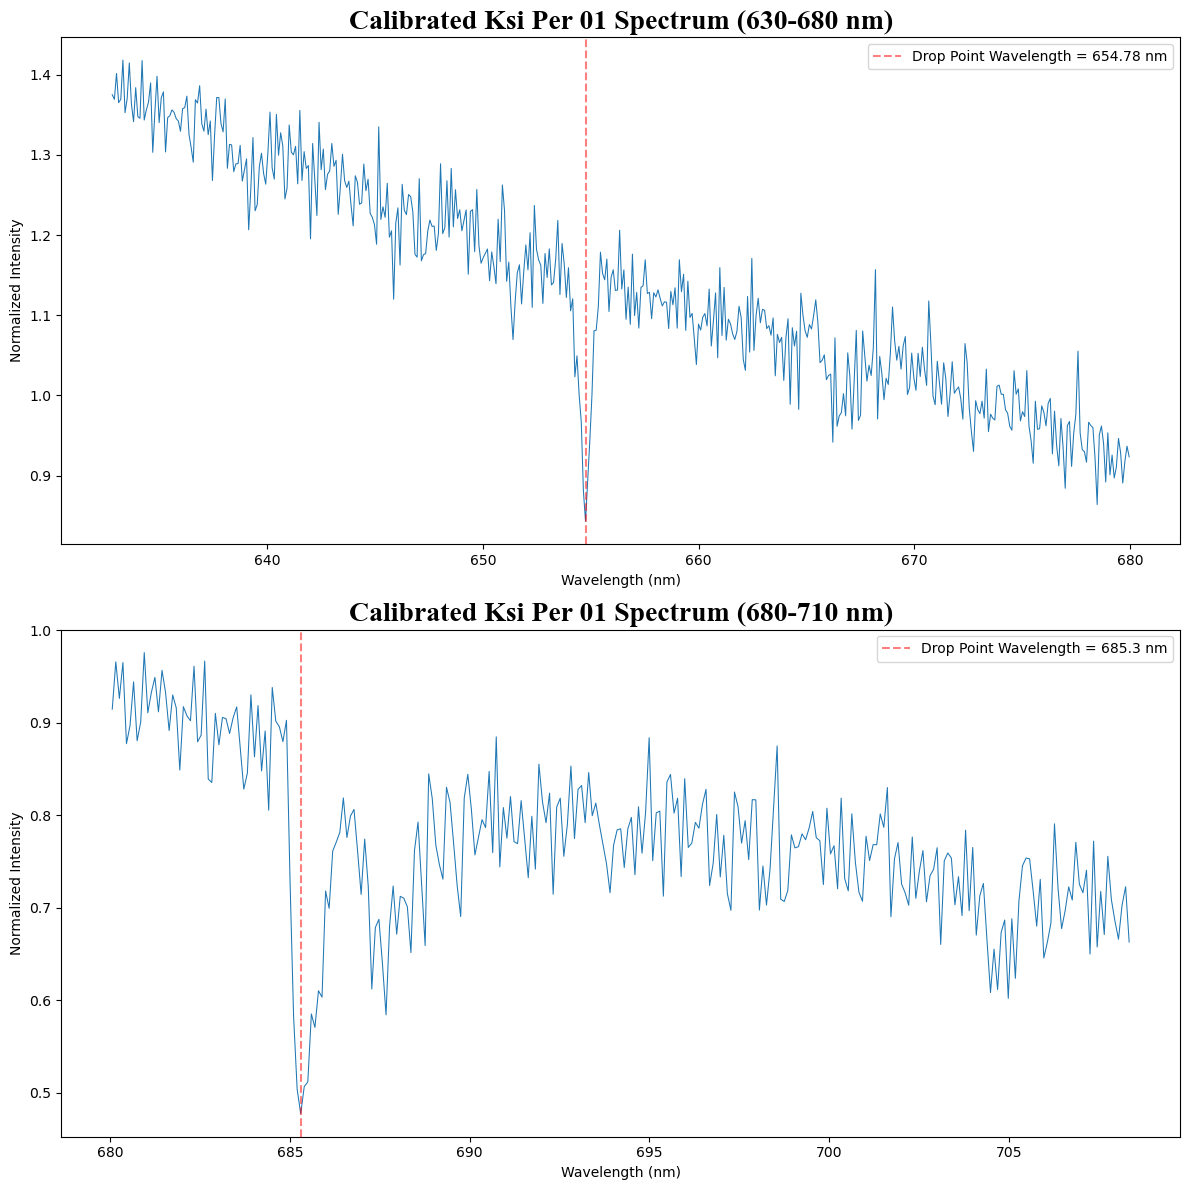

In [62]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# First plot: 630-670 nm
mask1 = (calibrated_wavelengths >= 630) & (calibrated_wavelengths <= 680)
axs[0].plot(calibrated_wavelengths[mask1], normalized_spectrum_data[mask1],lw=0.75)
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Normalized Intensity')
axs[0].set_title('Calibrated Ksi Per 01 Spectrum (630-680 nm)',fontname="Times New Roman", size=20,fontweight="bold")
axs[0].axvline(x = 654.78, color = 'red', linestyle = '--', alpha =0.5, label=f'Drop Point Wavelength = 654.78 nm')

# Second plot: 670-690 nm
mask2 = (calibrated_wavelengths >= 680) & (calibrated_wavelengths <= 710)
axs[1].plot(calibrated_wavelengths[mask2], normalized_spectrum_data[mask2],lw=0.75)
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Normalized Intensity')
axs[1].set_title('Calibrated Ksi Per 01 Spectrum (680-710 nm)',fontname="Times New Roman", size=20,fontweight="bold")
#axs[1].axvline(x = peak_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Peak Point Wavelength = {peak_wavelength:.5} nm')
axs[1].axvline(x = min_wavelength, color = 'red', linestyle = '--', alpha =0.5, label=f'Drop Point Wavelength = {min_wavelength:.5} nm')

# Add legends
axs[0].legend(loc=1)
axs[1].legend(loc=1)
#axs[2].legend()

# Show the plot
plt.tight_layout()
plt.show()